In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf

# Case Study

## Load the dataset and Plot 

In [5]:
oil = pd.read_csv('./oil_prices.csv', parse_dates=['Date'], index_col='Date')
oil['Price'] = [float(str(i).replace(",", ".")) for i in oil['Price']]
oil = oil.loc['2005':]
oil.head()

,Price
Date,
2005-01-04,40.75
2005-01-05,41.00
2005-01-06,43.25
2005-01-07,43.28
2005-01-10,44.71


In [6]:
ingredient = pd.read_csv('./ingredient_prices.csv', parse_dates=['Date'], index_col = 'Date')
ingredient['Price'] = [float(str(i).replace(",", ".")) for i in ingredient['Price']]
ingredient.head()

,Price
Date,
2005-01-01,570.0
2005-02-01,570.0
2005-03-01,610.0
2005-04-01,600.0
2005-05-01,570.0


In [7]:
oil.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901 entries, 2005-01-04 to 2020-06-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   3891 non-null   float64
dtypes: float64(1)
memory usage: 61.0 KB


In [8]:
ingredient.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2005-01-01 to 2020-04-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   183 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


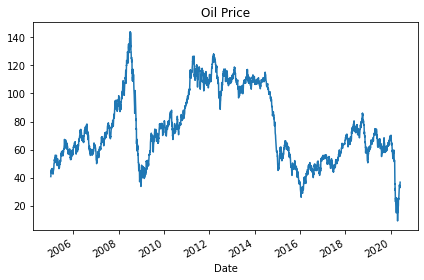

In [13]:
oil.Price.plot(title='Oil Price')
plt.tight_layout()
plt.savefig('./Plots/oil_prince.png', dpi=300)
plt.show()

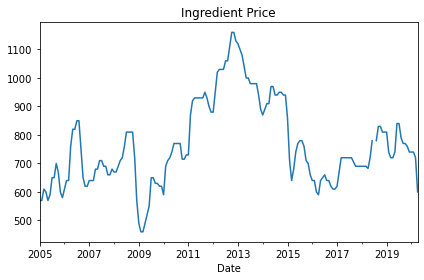

In [14]:
ingredient.Price.plot(title='Ingredient Price')
plt.tight_layout()
plt.show()

In [12]:
oil.loc['2017-4-27']['Price'] = 49.46
ingredient.loc['2016-2-1']['Price'] = 640.0
ingredient.loc['2012-12-1']['Price'] = 1130.00

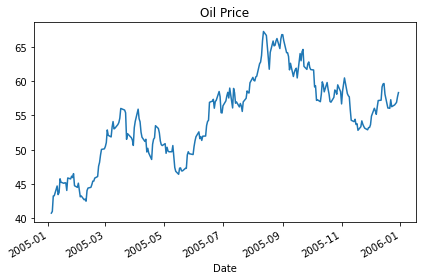

In [10]:
oil['2005':'2005'].Price.plot(title='Oil Price')
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

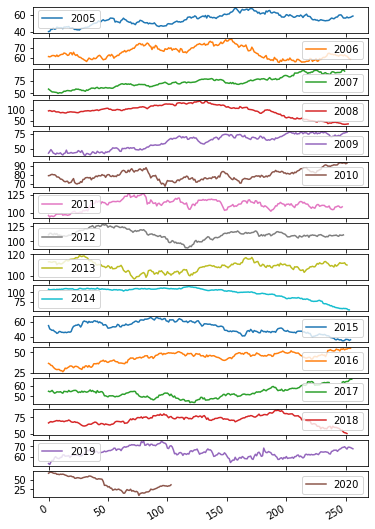

In [17]:
oil_prices = pd.DataFrame()
for year in range(2005, 2021):
    price_per_year = oil.loc[str(year), ['Price']].reset_index(drop=True)
    price_per_year.rename(columns={'Price': str(year)}, inplace=True)
    oil_prices = pd.concat([oil_prices, price_per_year], axis = 1)

fig = plt.figure()
oil_prices.plot(subplots=True, figsize=(6,10))
plt.show()

<Figure size 432x288 with 0 Axes>

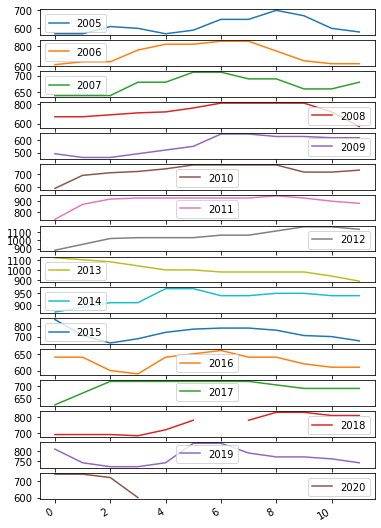

In [18]:
ingredient_prices = pd.DataFrame()
for year in range(2005, 2021):
    price_per_year = ingredient.loc[str(year), ['Price']].reset_index(drop=True)
    price_per_year.rename(columns={'Price': str(year)}, inplace=True)
    ingredient_prices = pd.concat([ingredient_prices, price_per_year], axis = 1)

fig = plt.figure()
ingredient_prices.plot(subplots=True, figsize=(6,10))
plt.show()

## Oil shift and lag

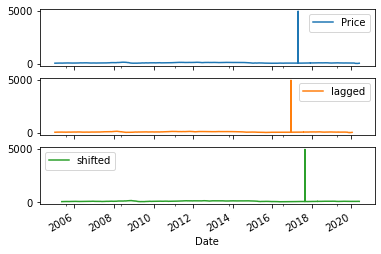

In [123]:
oil['lagged'] = oil.Price.shift(periods=-90)
oil['shifted'] = oil.Price.shift(periods=90)
oil.plot(subplots=True)
plt.show()

## Missing Valus

In [15]:
oil[oil.Price.isnull()]

,Price
Date,
2017-12-01,NaN
2017-12-04,NaN
2017-12-05,NaN
2017-12-06,NaN
2017-12-07,NaN
2017-12-08,NaN
2017-12-11,NaN
2017-12-12,NaN
2017-12-13,NaN


In [16]:
ingredient[ingredient.Price.isnull()]

,Price
Date,
2018-07-01,NaN


## Oil Price Prediction

In [42]:
# oil_3y = oil[oil.Date < '2008-01-01']
oil_3y = oil[oil.Date < '2005-10-01']

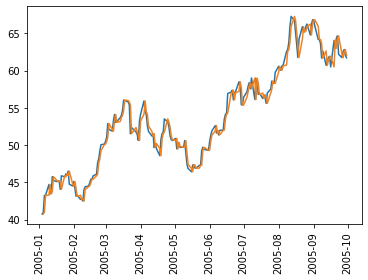

In [44]:
plt.plot(oil_3y.Date, oil_3y.Price)
plt.plot(oil_3y.Date[1:], oil_3y.Price[:-1])
plt.xticks(rotation=90)
plt.show()

In [49]:
print(tf.keras.metrics.mean_squared_error(oil_3y.Price[1:], oil_3y.Price[:-1]).numpy())

1.2328796875000012


In [80]:
oil.Date

0       5/20/1987
1       5/21/1987
2       5/22/1987
3       5/25/1987
4       5/26/1987
          ...    
8380    5/26/2020
8381    5/27/2020
8382    5/28/2020
8383    5/29/2020
8384     6/1/2020
Name: Date, Length: 8385, dtype: object